<a href="https://colab.research.google.com/github/dayaiit/Machine-Learning/blob/main/L15_Simple_Neural_Network_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forward Pass:
Input x: [[1.]]
Prediction: [[7.]]
Target y: [[5.]]
Loss: 2.0

Backpropagation - Gradients:
Variable shape: (1, 1), name: kernel
Gradient: [[6.]]
Variable shape: (1,), name: bias
Gradient: [6.]
Variable shape: (1, 1), name: kernel
Gradient: [[4.]]
Variable shape: (1,), name: bias
Gradient: [2.]

Verifying with manual calculations:
dJ/dw2 should be 4, TensorFlow calculated: 4.0
dJ/db2 should be 2, TensorFlow calculated: 2.0
dJ/dw1 should be 6, TensorFlow calculated: 6.0
dJ/db1 should be 6, TensorFlow calculated: 6.0

Iteration 1:
Prediction: 7.0, Target: 5.0
Loss: 2.0
kernel: [1.4] (initial: [2.])
bias: [-0.6] (initial: [0.])
kernel: [2.6] (initial: [3.])
bias: [0.8] (initial: [1.])

Iteration 3:
Prediction: 6.280887126922607, Target: 5.0
Loss: 0.8203359246253967
kernel: [1.5964456] (initial: [2.])
bias: [-0.40355444] (initial: [0.])
kernel: [2.525924] (initial: [3.])
bias: [0.8839114] (initial: [1.])

Iteration 5:
Prediction: 5.645022869110107, Target: 5.0
Loss: 0.2080272

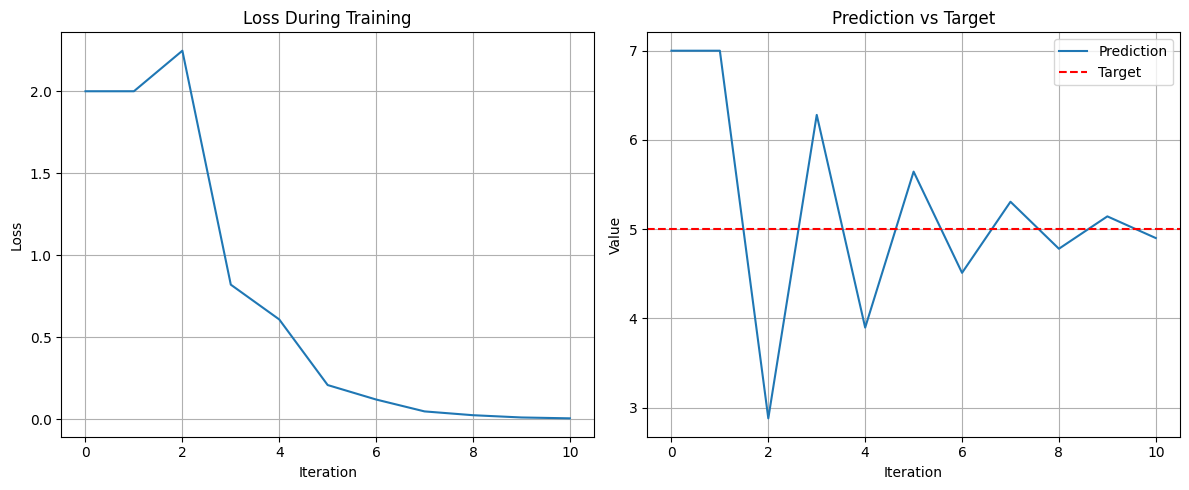

Model graph saved to 'model_graph.png'

Final model performance:
Prediction: 5.066333293914795, Target: 5.0
Loss: 0.0022000528406351805


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Let's recreate our simple example from the video
# Create a model with one hidden unit and one output unit

class SimpleModel(tf.keras.Model):
    def __init__(self):
        super(SimpleModel, self).__init__()
        # Initialize with the same weights we had in our example
        self.dense1 = tf.keras.layers.Dense(1, activation='relu',
                                           kernel_initializer=tf.constant_initializer([[2]]),
                                           bias_initializer=tf.constant_initializer([0]))

        self.dense2 = tf.keras.layers.Dense(1, activation='relu',
                                           kernel_initializer=tf.constant_initializer([[3]]),
                                           bias_initializer=tf.constant_initializer([1]))

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

# Create our model
model = SimpleModel()

# Define our training example
x = tf.constant([[1.0]])
y = tf.constant([[5.0]])

# Let's trace through the forward pass
with tf.GradientTape() as tape:
    # Forward pass
    prediction = model(x)

    # Compute loss
    loss = 0.5 * tf.reduce_sum(tf.square(prediction - y))

print("Forward Pass:")
print(f"Input x: {x.numpy()}")
print(f"Prediction: {prediction.numpy()}")
print(f"Target y: {y.numpy()}")
print(f"Loss: {loss.numpy()}")

# Compute gradients
gradients = tape.gradient(loss, model.trainable_variables)

print("\nBackpropagation - Gradients:")
for var, grad in zip(model.trainable_variables, gradients):
    print(f"Variable shape: {var.shape}, name: {var.name}")
    print(f"Gradient: {grad.numpy()}")

# Now let's verify these gradients match our manual calculations

print("\nVerifying with manual calculations:")
print(f"dJ/dw2 should be 4, TensorFlow calculated: {gradients[2].numpy()[0][0]}")
print(f"dJ/db2 should be 2, TensorFlow calculated: {gradients[3].numpy()[0]}")
print(f"dJ/dw1 should be 6, TensorFlow calculated: {gradients[0].numpy()[0][0]}")
print(f"dJ/db1 should be 6, TensorFlow calculated: {gradients[1].numpy()[0]}")

# Let's use TensorFlow to do gradient descent for us
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# Save initial weights
initial_weights = []
for var in model.trainable_variables:
    initial_weights.append(var.numpy().copy())

losses = [loss.numpy()]
predictions = [prediction.numpy()[0][0]]

# Training loop
for i in range(10):
    with tf.GradientTape() as tape:
        prediction = model(x)
        loss = 0.5 * tf.reduce_sum(tf.square(prediction - y))

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    losses.append(loss.numpy())
    predictions.append(prediction.numpy()[0][0])

    if i % 2 == 0:
        print(f"\nIteration {i+1}:")
        print(f"Prediction: {prediction.numpy()[0][0]}, Target: {y.numpy()[0][0]}")
        print(f"Loss: {loss.numpy()}")
        for j, var in enumerate(model.trainable_variables):
            print(f"{var.name}: {var.numpy().flatten()} (initial: {initial_weights[j].flatten()})")

# Plot the learning progress
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Loss During Training')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(predictions, label='Prediction')
plt.axhline(y=y.numpy()[0][0], color='r', linestyle='--', label='Target')
plt.title('Prediction vs Target')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('training_progress.png')
plt.show()

# Create a visualization of the computation graph
try:
    # Using TensorFlow's built-in graph visualization (if running in an environment that supports it)
    tf.keras.utils.plot_model(model, to_file='model_graph.png', show_shapes=True)
    print("Model graph saved to 'model_graph.png'")
except Exception as e:
    print("Could not generate graph visualization:", e)

print("\nFinal model performance:")
final_prediction = model(x)
final_loss = 0.5 * tf.reduce_sum(tf.square(final_prediction - y))
print(f"Prediction: {final_prediction.numpy()[0][0]}, Target: {y.numpy()[0][0]}")
print(f"Loss: {final_loss.numpy()}")